<a href="https://colab.research.google.com/github/Sn0wy-0wl/Kaggle_Titanic/blob/main/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split\

from tensorflow import keras 
from tensorflow.keras import initializers
from tensorflow.keras import layers

from keras import optimizers

In [ ]:
train_file_path = "input/train.csv"

X = pd.read_csv(train_file_path)

features = ["Pclass", "Sex", "Age", "Survived"]

X = pd.get_dummies(X[features])
print(X.describe())

X = pd.concat([X.drop('Pclass', axis=1), pd.get_dummies(X['Pclass'], prefix="Pclass")], axis=1)

imputer = SimpleImputer()
imputed_X = pd.DataFrame(imputer.fit_transform(X))

imputed_X.columns = X.columns
X = imputed_X

y = X.Survived
X = X.drop("Survived", axis=1)  

           Pclass         Age    Survived  Sex_female    Sex_male
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.383838    0.352413    0.647587
std      0.836071   14.526497    0.486592    0.477990    0.477990
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    0.000000
50%      3.000000   28.000000    0.000000    0.000000    1.000000
75%      3.000000   38.000000    1.000000    1.000000    1.000000
max      3.000000   80.000000    1.000000    1.000000    1.000000


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
X_train.describe()

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,29.860004,0.345808,0.654192,0.244012,0.206587,0.549401
std,12.963559,0.475988,0.475988,0.429822,0.405160,0.497926
min,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,1.000000,0.000000,0.000000,1.000000
75%,36.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

def train_model():

  #softmax
  #relu

  model = keras.Sequential([

      layers.Dense(
          units=128,
          activation = "tanh",
          input_shape = [6]
      ),                        

      layers.Dropout(0.2),

      layers.Dense(
          units = 256,
          activation = "tanh",
      ),
      
      layers.Dropout(0.2),

      layers.Dense(
          units = 512,
          activation = "tanh",
      ),

      layers.Dropout(0.2),

      layers.Dense(
          units = 1024,
          activation = "tanh",
      ),

      layers.Dropout(0.2),

      layers.Dense(
          units = 1,
          activation = "sigmoid"
      )
  ])

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      epochs = 25
  )

  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot()

  return model

Epoch 1/25
21/21 [==============================] - 1s 31ms/step - loss: 0.9646 - accuracy: 0.5548 - val_loss: 0.6030 - val_accuracy: 0.6413
Epoch 2/25
21/21 [==============================] - 0s 23ms/step - loss: 0.7452 - accuracy: 0.5446 - val_loss: 0.5648 - val_accuracy: 0.6547
Epoch 3/25
21/21 [==============================] - 0s 20ms/step - loss: 0.7261 - accuracy: 0.6118 - val_loss: 0.5975 - val_accuracy: 0.6816
Epoch 4/25
21/21 [==============================] - 0s 23ms/step - loss: 0.5761 - accuracy: 0.7201 - val_loss: 0.4510 - val_accuracy: 0.7892
Epoch 5/25
21/21 [==============================] - 0s 23ms/step - loss: 0.5632 - accuracy: 0.7354 - val_loss: 0.4356 - val_accuracy: 0.7848
Epoch 6/25
21/21 [==============================] - 1s 25ms/step - loss: 0.5432 - accuracy: 0.7514 - val_loss: 0.4347 - val_accuracy: 0.7982
Epoch 7/25
21/21 [==============================] - 1s 25ms/step - loss: 0.5074 - accuracy: 0.7439 - val_loss: 0.4635 - val_accuracy: 0.8027
Epoch 8/25
21

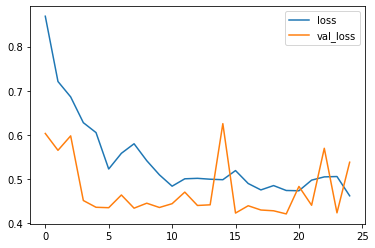

In [ ]:
model = train_model()

In [ ]:
v = np.array([19,0,1,0,0,1])

print(model.predict(v.reshape(1,6)))

[[0.28189033]]


In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train acc {train_acc*100}%")

Train acc [0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.4823512136936188, 0.803892195224762, 0.482351213693

In [ ]:
test_file_path = "input/test.csv"

test_data = pd.read_csv(test_file_path)

features = ["Pclass", "Sex", "Age"]

test = pd.get_dummies(test_data[features])
test = pd.concat([test.drop('Pclass', axis=1), pd.get_dummies(test['Pclass'], prefix="Pclass")], axis=1)

predictions = model.predict(test) 
predictions = predictions.ravel()
predictions = predictions.round()
predictions = np.nan_to_num(predictions)
predictions = predictions.astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, "Survived": predictions})
output.to_csv("my_submission.csv", index=False)
print("Yeah")

Yeah
